# Visualizing HSIC Measures

In [1]:
import sys, os
import warnings
import tqdm
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Insert path to model directory,.
cwd = os.getcwd()
path = f"{cwd}/../../src"
sys.path.insert(0, path)

# toy datasets
from data.toy import generate_dependence_data

# Kernel Dependency measure
from models.dependence import HSIC
from models.kernel import estimate_sigma, sigma_to_gamma, gamma_to_sigma, get_param_grid

# RBIG IT measures
from models.ite_algorithms import run_rbig_models

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore') # get rid of annoying warnings

%load_ext autoreload
%autoreload 2

In [8]:
save_path   = f'{cwd}/../../results/hsic/'
save_name   = 'large_v4_silv'

cols = ['dataset', 'trial', 'n_samples', 'd_dimensions', 'nu', 'gamma', 'scorer', 'value']
results_df = pd.read_csv(f"{save_path}{save_name}.csv")[cols]

In [9]:
results_df.tail()

,dataset,trial,n_samples,d_dimensions,nu,gamma,scorer,value
895,gauss,4,5000,100,NaN,62.683450,tka,1.0000
896,gauss,4,5000,100,NaN,0.014481,ctka,1.0000
897,gauss,5,5000,100,NaN,62.683450,hsic,0.0002
898,gauss,5,5000,100,NaN,62.683450,tka,1.0000
899,gauss,5,5000,100,NaN,62.683450,ctka,1.0000


In [11]:
res_samples = results_df['n_samples'].unique().tolist()
res_dimensions = results_df['d_dimensions'].unique().tolist()
res_scorer = results_df['scorer'].unique().tolist()

## Figure I - Gaussian Distribution

This first figure is to demonstrate how the mutual information compares with the amount of noise for each of the functions **Linear**, **Sinusoidal**, **Circular**, and **Random**.

In [47]:
results_gaussian = results_df[results_df['dataset'] == 'gauss']
results_tstudent = results_df[results_df['dataset'] == 'tstudent']


results_tstudent.head()

,dataset,trial,n_samples,d_dimensions,nu,gamma,scorer,value
0,tstudent,1,500,2,1.0,0.370104,hsic,0.002808
1,tstudent,1,500,2,1.0,0.039685,tka,0.954359
2,tstudent,1,500,2,1.0,396.850263,ctka,0.907592
3,tstudent,1,500,2,2.0,396.850263,hsic,0.001994
4,tstudent,1,500,2,2.0,0.039685,tka,0.961949


In [45]:
def plot_samples(res_df, idim):
    fig, ax = plt.subplots()
    sns.lineplot(x='n_samples', y='value', hue='scorer', data=res_df, ax=ax)
    ax.legend(['HSIC', 'KA', 'CKA'])
    ax.set_xlabel('Number of Samples')
    ax.set_ylabel('HSIC Value')
    ax.set_yscale('Log')
    ax.set_title(f"Dimensions: {idim}")
    plt.show()
    return None

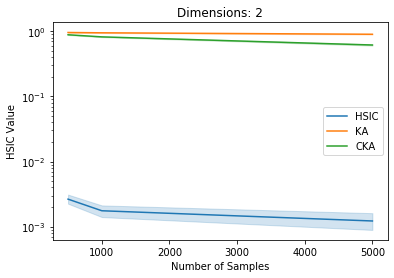

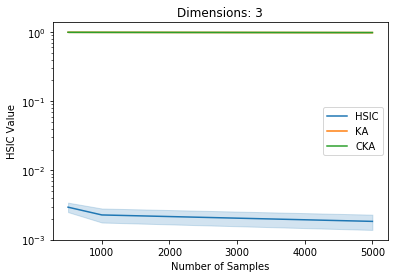

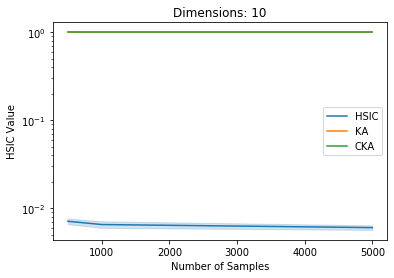

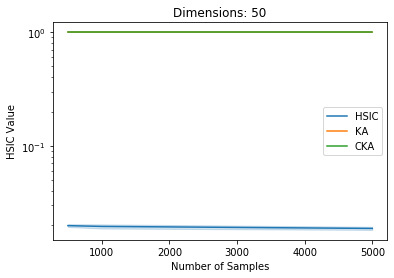

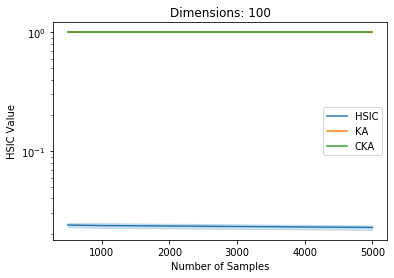

In [46]:
for idim, ires in results_tstudent.groupby('d_dimensions'):
#     print(ires)
    plot_samples(
        ires, idim
    )
    

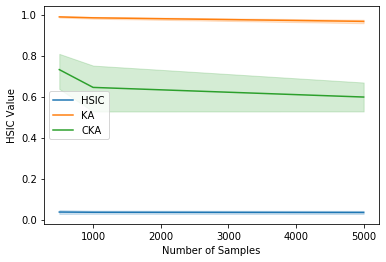

In [30]:
ex_plot = results_gaussian[results_gaussian['d_dimensions'] == 2]
ex_plot.head()


fig, ax = plt.subplots()
sns.lineplot(x='n_samples', y='value', hue='scorer', data=ex_plot, ax=ax)
ax.legend(['HSIC', 'KA', 'CKA'])
ax.set_xlabel('Number of Samples')
ax.set_ylabel('HSIC Value')
ax.set
plt.show()

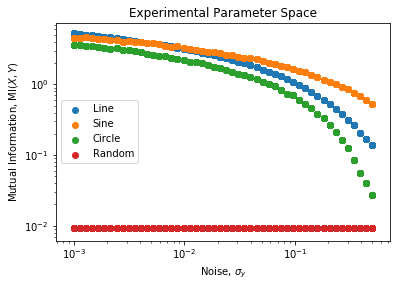

In [5]:
fig, ax = plt.subplots()
ax.scatter(
    results_df[results_df['function'] == 'line']['noise'], 
    results_df[results_df['function'] == 'line']['mi'],
    label='Line'
)
plt.xscale('log')
plt.yscale('log')

ax.scatter(
    results_df[results_df['function'] == 'sine']['noise'], 
    results_df[results_df['function'] == 'sine']['mi'], 
    label='Sine'
)
plt.xscale('log')
plt.yscale('log')


ax.scatter(
    results_df[results_df['function'] == 'circ']['noise'], 
    results_df[results_df['function'] == 'circ']['mi'], 
    label='Circle'
)

plt.xscale('log')
plt.yscale('log')

ax.scatter(
    results_df[results_df['function'] == 'rand']['noise'], 
    results_df[results_df['function'] == 'rand']['mi'], 
    label='Random'
)

plt.xscale('log')
plt.yscale('log')

ax.set_xlabel('Noise, $\sigma_y$')
ax.set_ylabel('Mutual Information, MI$(X,Y)$')
# ax.set_xscale('log')
plt.legend()
ax.set_title('Experimental Parameter Space')
plt.show()

In [36]:
def plot_res_gamma(results_df, function='line', hsic_method='hsic'):
    
    save_path = f'{cwd}/../../results/hsic/figures/'
    
    # Set Title stuff
    if function == 'line':
        title = 'Linear Function'
    elif function == 'sine':
        title = 'Sine Function'
    elif function == 'circ':
        title = 'Circle Function'
    elif function == 'rand':
        title = 'Random Function'
    else:
        raise ValueError(f'Unrecognized function: {line}')
        
    sub_results_df = results_df[results_df['function'] == function]
    free_params = [
    #     'gamma',
        'function'
    ]

    fixed_params = [
        'gamma',
        'value',
        'method',
        'mi'
    ]
    
    groups = sub_results_df.groupby(free_params)
    
    hue = 'gamma'

    fig, ax = plt.subplots(nrows=1, figsize=(7, 3))


    for iparams, idata in groups:

        # Plot I - HSIC
        pts = ax.scatter(
            x=idata[idata['scorer']== hsic_method]['value'],
            y=idata[idata['scorer']== hsic_method]['mi'],
            c=idata[idata['scorer']== hsic_method]['gamma'],
            s=20, cmap='Spectral',
            norm=matplotlib.colors.LogNorm()
        )
        ax.set_xlabel( hsic_method.upper() )
        ax.set_ylabel('Mutual Information')
        fig.colorbar(pts, ax=ax, label='Gamma')

    # ax[0].get_legend().remove()
    # ax[1].get_legend().remove()
    # ax[2].get_legend().remove()
    ax.set_yscale('log')
    ax.set_title(title)
    plt.tight_layout()
    plt.show()
    
    fig.savefig(f"{save_path}trialv1_{function}_{hsic_method}.png")
    
    return None

### Figure II - MI vs Gamma vs HSIC (Linear Function)

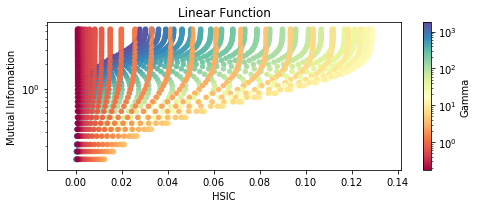

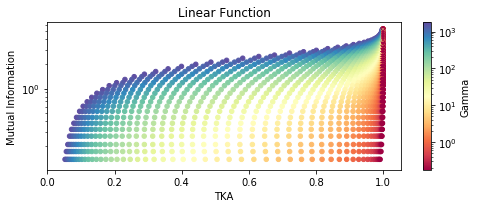

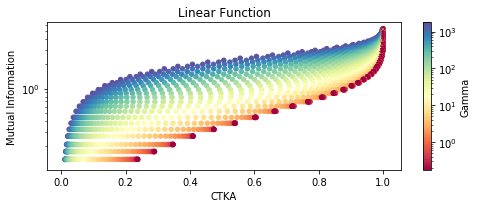

In [37]:
plot_res_gamma(results_df, function='line', hsic_method='hsic')
plot_res_gamma(results_df, function='line', hsic_method='tka')
plot_res_gamma(results_df, function='line', hsic_method='ctka')

### Case II - Sine


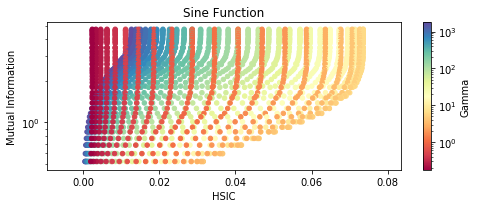

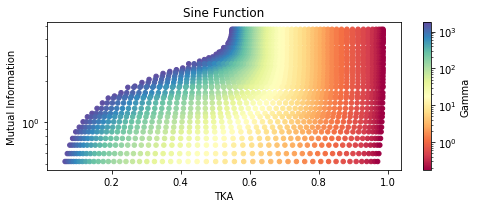

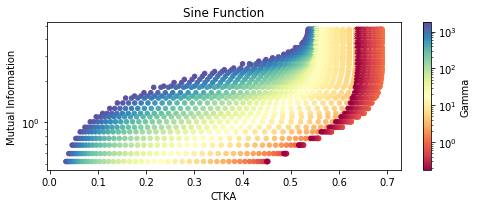

In [38]:
plot_res_gamma(results_df, function='sine', hsic_method='hsic')
plot_res_gamma(results_df, function='sine', hsic_method='tka')
plot_res_gamma(results_df, function='sine', hsic_method='ctka')

### Case III - Circle

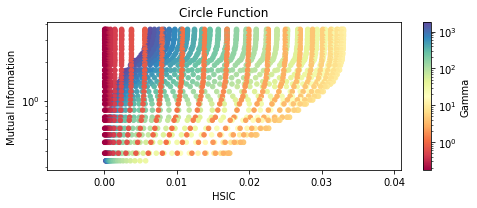

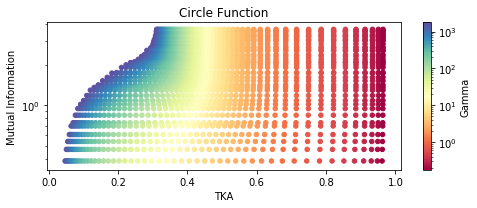

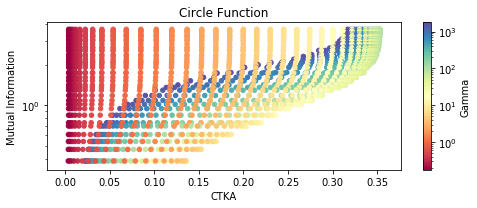

In [39]:
plot_res_gamma(results_df, function='circ', hsic_method='hsic')
plot_res_gamma(results_df, function='circ', hsic_method='tka')
plot_res_gamma(results_df, function='circ', hsic_method='ctka')

### Case IV - Random

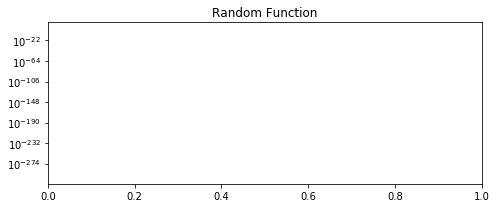

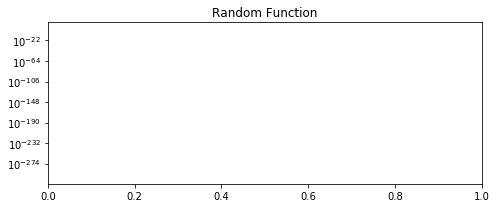

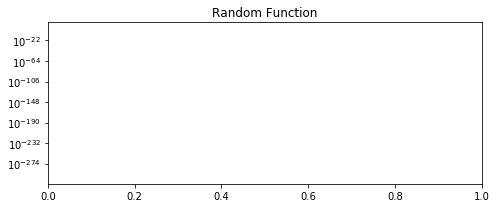

In [40]:
plot_res_gamma(results_df, function='rand', hsic_method='hsic')
plot_res_gamma(results_df, function='rand', hsic_method='tka')
plot_res_gamma(results_df, function='rand', hsic_method='ctka')